In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

In [2]:
# Load Dataset
file_path = r"C:/Users/jyots/OneDrive/Desktop/Women-Health/CLEAN- PCOS SURVEY SPREADSHEET.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              465 non-null    int64  
 1   Weight           465 non-null    float64
 2   Height           465 non-null    float64
 3   Blood_Group      465 non-null    int64  
 4   Period_Cycle     465 non-null    int64  
 5   Weight_Gain      465 non-null    int64  
 6   Facial_Hair      465 non-null    int64  
 7   Skin_Darkening   465 non-null    int64  
 8   Hair_Loss        465 non-null    int64  
 9   Acne             465 non-null    int64  
 10  Fast_Food        465 non-null    int64  
 11  Exercise         465 non-null    int64  
 12  PCOS_Diagnosed   465 non-null    int64  
 13  Mood_Swings      465 non-null    int64  
 14  Regular_Periods  465 non-null    int64  
 15  Period_Duration  465 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 58.3 KB
None
   Age  We

In [3]:
# Rename columns for better readability
df.columns = [
    "Age", "Weight", "Height", "Blood_Group", "Period_Cycle", "Weight_Gain", 
    "Facial_Hair", "Skin_Darkening", "Hair_Loss", "Acne", "Fast_Food", "Exercise", 
    "PCOS_Diagnosed", "Mood_Swings", "Regular_Periods", "Period_Duration"
]

# Check for missing values
missing_values = df.isnull().sum()

# Normalize numerical features (excluding categorical ones like Blood_Group, PCOS_Diagnosed)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["Age", "Weight", "Height", "Period_Cycle", "Period_Duration"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display cleaned dataset info
df.info(), missing_values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              465 non-null    float64
 1   Weight           465 non-null    float64
 2   Height           465 non-null    float64
 3   Blood_Group      465 non-null    int64  
 4   Period_Cycle     465 non-null    float64
 5   Weight_Gain      465 non-null    int64  
 6   Facial_Hair      465 non-null    int64  
 7   Skin_Darkening   465 non-null    int64  
 8   Hair_Loss        465 non-null    int64  
 9   Acne             465 non-null    int64  
 10  Fast_Food        465 non-null    int64  
 11  Exercise         465 non-null    int64  
 12  PCOS_Diagnosed   465 non-null    int64  
 13  Mood_Swings      465 non-null    int64  
 14  Regular_Periods  465 non-null    int64  
 15  Period_Duration  465 non-null    float64
dtypes: float64(5), int64(11)
memory usage: 58.3 KB


(None,
 Age                0
 Weight             0
 Height             0
 Blood_Group        0
 Period_Cycle       0
 Weight_Gain        0
 Facial_Hair        0
 Skin_Darkening     0
 Hair_Loss          0
 Acne               0
 Fast_Food          0
 Exercise           0
 PCOS_Diagnosed     0
 Mood_Swings        0
 Regular_Periods    0
 Period_Duration    0
 dtype: int64)

In [4]:
# Selecting relevant features for clustering
features = ["Age", "Weight", "Height", "Period_Cycle", "Weight_Gain", "Facial_Hair", 
            "Skin_Darkening", "Hair_Loss", "Acne", "Fast_Food", "Exercise", 
            "Mood_Swings", "Regular_Periods", "Period_Duration"]

X = df[features]

# Checking feature correlation to validate relevance
correlation_matrix = X.corr()

# Display correlation matrix
correlation_matrix



,Age,Weight,Height,Period_Cycle,Weight_Gain,Facial_Hair,Skin_Darkening,Hair_Loss,Acne,Fast_Food,Exercise,Mood_Swings,Regular_Periods,Period_Duration
Age,1.000000,0.226502,-0.064808,0.035382,-0.019790,-0.124182,-0.109361,0.048006,-0.290721,-0.274872,0.022564,-0.148637,0.013968,-0.233625
Weight,0.226502,1.000000,0.110967,0.155728,0.318842,0.119224,0.148501,0.071359,-0.051330,0.018304,0.081862,0.008534,-0.120602,-0.061328
Height,-0.064808,0.110967,1.000000,0.015079,-0.088627,0.064152,0.057957,0.059696,0.053009,0.025966,-0.090835,0.147640,-0.014510,0.008294
Period_Cycle,0.035382,0.155728,0.015079,1.000000,0.146152,0.250055,0.220359,0.099901,0.019943,-0.033061,0.004747,0.070725,-0.714271,0.137728
Weight_Gain,-0.019790,0.318842,-0.088627,0.146152,1.000000,0.257121,0.284959,0.130131,0.103025,0.137352,-0.025156,0.107144,-0.187307,0.000560
Facial_Hair,-0.124182,0.119224,0.064152,0.250055,0.257121,1.000000,0.272918,0.128727,0.200163,0.089696,0.062787,0.118505,-0.243848,0.080045
Skin_Darkening,-0.109361,0.148501,0.057957,0.220359,0.284959,0.272918,1.000000,0.241275,0.158625,0.081662,-0.039300,0.197109,-0.201848,0.020146
Hair_Loss,0.048006,0.071359,0.059696,0.099901,0.130131,0.128727,0.241275,1.000000,0.198661,0.060634,-0.131082,0.122063,-0.054596,0.023661
Acne,-0.290721,-0.051330,0.053009,0.019943,0.103025,0.200163,0.158625,0.198661,1.000000,0.127874,0.010476,0.162219,-0.071331,0.099026
Fast_Food,-0.274872,0.018304,0.025966,-0.033061,0.137352,0.089696,0.081662,0.060634,0.127874,1.000000,-0.057192,0.124759,0.031793,0.037380


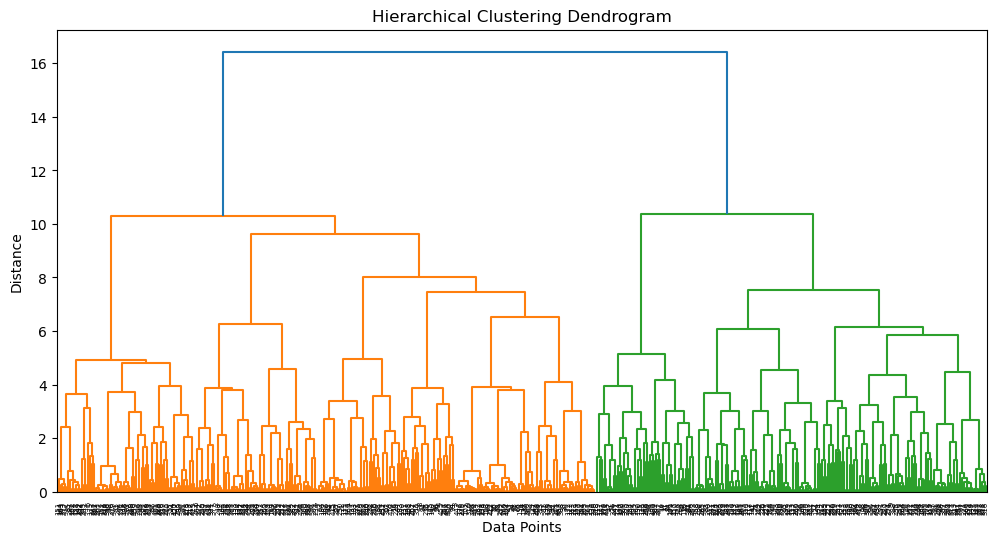

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute linkage matrix using Ward's method
linkage_matrix = sch.linkage(X, method='ward')

# Plot dendrogram to determine optimal clusters
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [6]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering with corrected parameters
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X)

# Display cluster distribution
df['HC_Cluster'].value_counts()



HC_Cluster
0    200
1    146
3     69
2     50
Name: count, dtype: int64

In [7]:
from sklearn.mixture import GaussianMixture

# Apply GMM with k=4
gmm = GaussianMixture(n_components=4, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X)

# Display cluster distribution from GMM
df["GMM_Cluster"].value_counts()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GMM_Cluster
3    227
0    100
1     89
2     49
Name: count, dtype: int64

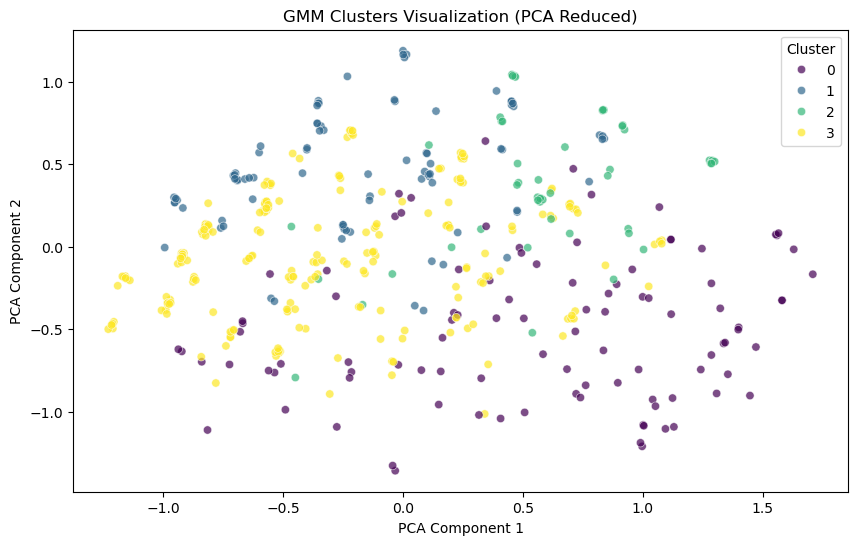

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to dataframe
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Plot GMM Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["GMM_Cluster"], palette="viridis", alpha=0.7)
plt.title("GMM Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for GMM clusters
silhouette_gmm = silhouette_score(X, df["GMM_Cluster"])

# Compute Silhouette Score for Hierarchical Clustering
silhouette_hc = silhouette_score(X, df["HC_Cluster"])

silhouette_gmm, silhouette_hc


(0.10202601870988595, 0.10655166216360178)

In [10]:
# Compute mean feature values for each Hierarchical Clustering group
hc_cluster_summary = df.groupby("HC_Cluster")[features].mean()

# Compute mean feature values for each GMM cluster
gmm_cluster_summary = df.groupby("GMM_Cluster")[features].mean()

hc_cluster_summary, gmm_cluster_summary


(                 Age    Weight    Height  Period_Cycle  Weight_Gain  \
 HC_Cluster                                                            
 0           0.283000  0.345358  0.852912      0.080000     0.090000   
 1           0.240791  0.417246  0.851648      0.030822     0.952055   
 2           0.269333  0.523731  0.848242      0.600000     0.980000   
 3           0.340419  0.380597  0.810333      0.014493     0.391304   
 
             Facial_Hair  Skin_Darkening  Hair_Loss      Acne  Fast_Food  \
 HC_Cluster                                                                
 0              0.110000        0.200000   0.520000  0.400000   0.340000   
 1              0.404110        0.465753   0.719178  0.493151   0.520548   
 2              0.660000        0.880000   0.840000  0.600000   0.360000   
 3              0.130435        0.072464   0.536232  0.144928   0.072464   
 
             Exercise  Mood_Swings  Regular_Periods  Period_Duration  
 HC_Cluster                          